Cargando todas las dependencias:

In [1]:
from math import sqrt
from math import atan2
from math import pi

import numpy as np
import matplotlib.pyplot as plt
from random import choice

from matplotlib.patches import Circle
from math import ceil

from mpl_toolkits.mplot3d import axes3d

## Calculando la fuerza electrica entre dos cargas (programa 1)

In [2]:


###############################################################################

"""
vlist is a list of vectors

Returns a list with tuple entries, tuple[0] is the magnitud of the vector and
tuple[1] is the angle of the vector in a plane.
"""
def calculate_magnitude_direction(vlist):
    return [(calculate_magnitude(v), calculate_angle(v)) for v in vlist]

###############################################################################                                      
                                                                                                                     
"""                                                                                                                  
v is a vector                                                                                                        
                                                                                                                     
Returns the magnitude of the vector                                                                                  
"""                                                                                                                  
def calculate_magnitude(v):                                                                                          
    return sqrt(sum(vi**2 for vi in v))                                                                              
                                                                                                                     
###############################################################################                                      
                                                                                                                     
"""                                                                                                                  
v is a vector                                                                                                        
                                                                                                                     
Returns the angle of the vector in a plane. Only uses the first 2 entries even                                       
if it has more than 2                                                                                                
"""                                                                                                                  
def calculate_angle(v):                                                                                              
    angle = atan2(v[1], v[0])
    return  angle if angle >= 0 else angle + 2*pi

###############################################################################

"""
q1 is charge 1
q2 is charge 2
distance is the distance between both charges

Returns the electrical force of the charges
"""
def calculate_electrical_force(q1, q2, distance):
    k = 9e9
    return abs(k*q1*q2/(distance**2))

###############################################################################

"""
p1 is a coordinate point (x1, x2, ..., xn)
p2 is a coordinate point (x1, x2, ..., xn)

Returns the euclidean distance of p1 and p2
"""
def calculate_distance(p1, p2):
    s = sum( ((x1-x2)**2 for x1, x2 in zip(p1, p2)) )
    return sqrt(s)

###############################################################################

"""
q1 is charge 1
q2 is charge 2
p1 is a coordinate point (x1, x2, ..., xn)
p2 is a coordinate point (x1, x2, ..., xn)

Returns the unit vector of the direction of the force felt by q1 being
excerted by q2.
"""
#either q1 is atracted or repelled by q2
#Direction will be the unit vector with the direction of charge 1 being
#affected by charge 2
def calculate_direction(q1, q2, p1, p2):
    distance = calculate_distance(p1, p2)

    if q1*q2 >= 0: #q1 is repeled to q2
        v = [(a-b) for a, b in zip(p1, p2)]
    else:         #q1 is attracted to q2
        v = [(b-a) for a, b in zip(p1, p2)]

    return [x/distance for x in v]

###############################################################################

"""
qlist is a list of charges
plist is a list of points corresponding to each charge in qlist

Returns a list where each entry is the sum of the forces being excerted by the
other charges e.g. [q1, q2, q3], [p1, p2, p3] the result would be [sf1, sf2, sf3]
and sf1 would be the force felt by q1 by q2 and q3.
"""
def calculate_force_vector(qlist, plist):

    li = []
    for i in range(len(qlist)):
        qlist_noi = qlist[:i] + qlist[i+1:]
        plist_noi = plist[:i] + plist[i+1:]

        flist = [calculate_electrical_force(qlist[i], q2, calculate_distance(plist[i], p2))
                    for q2, p2 in zip(qlist_noi, plist_noi)]

        dlist = [calculate_direction(qlist[i], q2, plist[i], p2)
                            for q2, p2 in zip(qlist_noi, plist_noi)]

        force_vector= [[f*elem for elem in p] for f, p in zip(flist, dlist)]

        force_sum = [sum(x) for x in zip(*force_vector)]

        li.append(force_sum)

    return li

def print_force_vector(flist):
    for i in range(len(flist)):
        print("F" + str(i) + ": " + str(flist[i]))

def print_magnitude_direction(flist):
    for i in range(len(flist)):
        print("F" + str(i) + ": " + "Magnitude: " + str(flist[i][0]) + "\tAngle: " + str(flist[i][1]))


###############################################################################
"""
flist is a force list

Returns a single force, the vectorial sum of all the forces.
"""
def sum_force(flist):
    sumforce = [sum(x) for x in zip(*flist)]

    return sumforce
        

Un ejemplo de 3 cargas:

List of charges:
[7.5e-06, 4.8e-06, -8.5e-06]
List of positions:
[(0, 0), (0.35, 0), (0.7, 0)]
Force as vectors:
F0: [-1.473979591836735, 0.0]
F1: [5.642448979591837, 0.0]
F2: [-4.168469387755103, 0.0]
Sum of forces:
[-8.881784197001252e-16, 0.0]


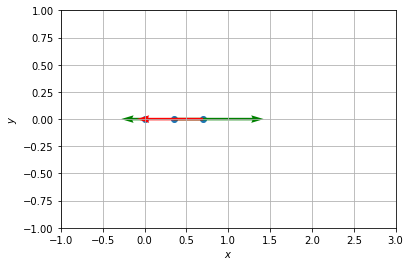

In [3]:

qlist = [75e-7, 48e-7, -85e-7]
plist = [(0, 0), (0.35, 0), (0.7, 0)]

print("List of charges:")
print(qlist)
print("List of positions:")
print(plist)

d = calculate_force_vector(qlist, plist)
print("Force as vectors:")
print_force_vector(d)

print("Sum of forces:")
sumforces = sum_force(d)
print(sumforces)

x = []
y = []
for p in plist:
    x.append(p[0])
    y.append(p[1])

plt.scatter(x, y)
for i in range(len(plist)):
    V = np.array([d[i]])
    origin = plist[i][0], plist[i][1] # origin point

    plt.quiver(*origin, V[:,0], V[:,1], color=choice(['r','g','b']), scale=21)
    plt.grid()

    ax = plt.gca()
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_ylim([-1, 1])
    ax.set_xlim([-1, 3])

plt.show()

Otro ejemplo de 4 cargas:

List of charges:
[4.15e-06, 4.15e-06, 4.15e-06, 4.15e-06]
List of positions:
[(0, 0.1), (0.1, 0.1), (0, 0), (0.1, 0)]
Force as vectors:
F0: [-20.980415942543388, 20.980415942543388]
F1: [20.980415942543388, 20.980415942543388]
F2: [-20.980415942543388, -20.980415942543388]
F3: [20.980415942543388, -20.980415942543388]
Sum of forces:
[0.0, 0.0]


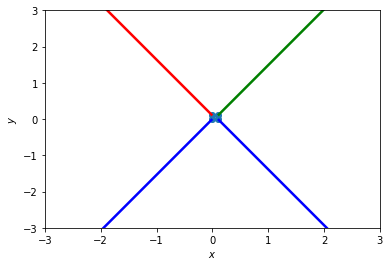

In [4]:

qlist = [4.15e-6 for _ in range(4)]
plist = [(0, .1), (.1, .1), (0, 0), (0.1, 0)]

print("List of charges:")
print(qlist)
print("List of positions:")
print(plist)

d = calculate_force_vector(qlist, plist)
print("Force as vectors:")
print_force_vector(d)

print("Sum of forces:")
sumforces = sum_force(d)
print(sumforces)

x = []
y = []
for p in plist:
    x.append(p[0])
    y.append(p[1])

plt.scatter(x, y)
for i in range(len(plist)):
    V = np.array([d[i]])
    origin = plist[i][0], plist[i][1] # origin point

    plt.quiver(*origin, V[:,0], V[:,1], color=choice(['r','g','b']), scale=21)
    plt.grid()

    ax = plt.gca()
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_ylim([-3, 3])
    ax.set_xlim([-3, 3])

plt.show()

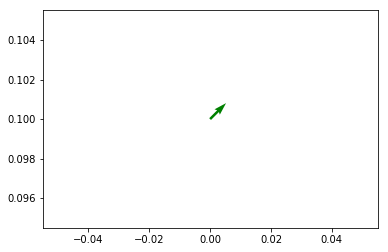

In [5]:


V = np.array([[1,1]])
origin = plist[0][0], plist[0][1] # origin point

plt.quiver(*origin, V[:,0], V[:,1], color=choice(['r','b','g']), scale=21)
plt.show()

## Calculando el campo electrico de un dipolo (programa 2)

In [6]:

K = 9e9


Las principales ecuaciones del campo electrico de una sola carga y de una lista de cargas:

In [7]:
##############################################################################

def E(q, r0, x, y):
    """Return the electric field vector E=(Ex,Ey) due to charge q at r0."""
    den = np.hypot(x-r0[0], y-r0[1])**3
    return q * (x - r0[0]) / den, q * (y - r0[1]) / den

##############################################################################


def field_vector(charges, nx, ny, X, Y):
    Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
    for charge in charges:
        ex, ey = E(*charge, x=X, y=Y)
        Ex += ex
        Ey += ey
        
    return Ex, Ey

##############################################################################


Crea el dipolo a usar

In [8]:
# Create a multipole with 2 charges of alternating sign, equally spaced
# on the unit circle.
nq = 2
charges = []
#Open a file with the dipole information
try:
    with open('dipole.txt') as f:
        q = [float(x) for x in next(f).split()][0] # read first line

        r0 = tuple( float(x) for x in next(f).split() ) #reads second line
        r1 = tuple(float(x) for x in next(f).split()) #reads third line
        charges.append((-np.abs(q), r0))
        charges.append((np.abs(q), r1))

except FileNotFoundError:
    #if file doesn't exist, use default dipole
    print('File does not exist. Using default dipole')

    for i in range(nq):
        q = i%2 * 2 - 1
        charges.append((q, (np.cos(2*np.pi*i/nq), np.sin(2*np.pi*i/nq))))
        
        
#print the dipole information for the user
for charge in charges:
    print("Carga: {} coulombs".format(charge[0]))
    print("Posicion: ({}, {})".format(charge[1][0], charge[1][1]))



Carga: -1.0 coulombs
Posicion: (1.0, 0.0)
Carga: 1.0 coulombs
Posicion: (-1.0, 0.0)


Crea la grafica y finalmente muestra el campo electrico del dipolo centrado:

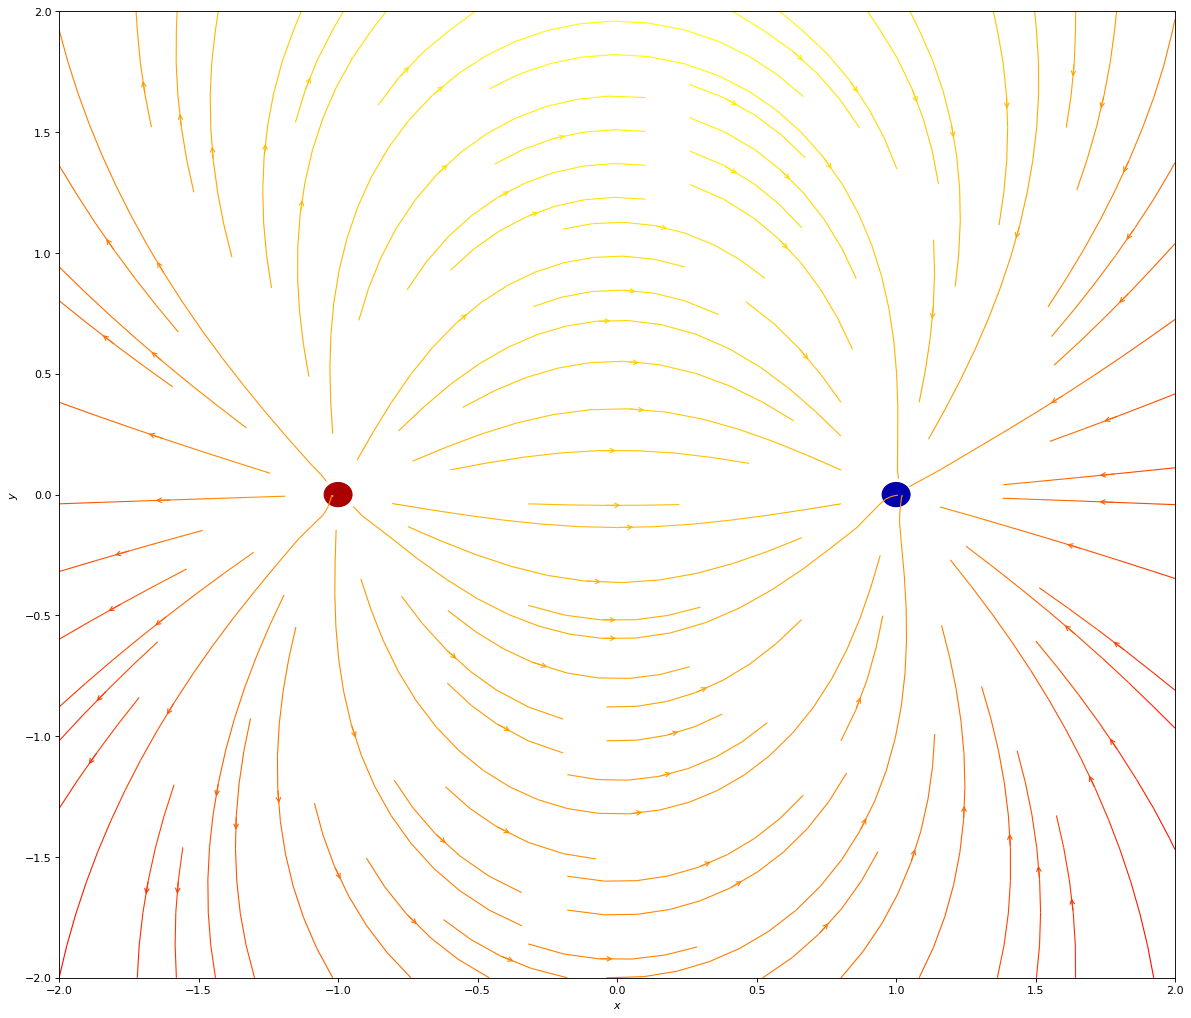

In [9]:
# Grid of x, y points
nx, ny = 64, 64
xlim = 2
ylim = 2
x = np.linspace(-xlim, xlim, nx)
y = np.linspace(-ylim, ylim, ny)
X, Y = np.meshgrid(x, y)

##Plots ################################################################
fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)

# Plot the electric potential with an appropriate colormap and arrow style

# Plot the electric field
Ex, Ey = field_vector(charges, nx, ny, X, Y)
color = -1 - X**2 + Y
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap='autumn',
              density=1, arrowstyle='->', arrowsize=1)


# Add filled circles for the charges themselves
charge_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in charges:
    ax.add_artist(Circle(pos, 0.05, color=charge_colors[q>0]))
##############################################################################

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-xlim, xlim)
ax.set_ylim(-ylim, ylim)
plt.show()


## Calculando el potencial electrico (programa 3)

Las principales ecuaciones a utilizar son las de calcular el potencial electrico para una carga y para una lista de cargas en el espacio

In [10]:

##############################################################################

"""
q is the charge of each part of the dipole
p0 is the position of negative dipole
p1 is the position of positive dipole
d is the distance between the two charges of the dipole
point is a numpy array with the coordinates of the point to calculate
      the electric potencial

p0[0] is negative and is in (-d, 0)
p1[1] is positive and is in (d, 0)
"""
def electric_potential(q, r0, x, y):
    r0 = (r0[1], r0[0]) #rotates charge
    dx = x - r0[0]
    dy = y - r0[1]
    r = np.hypot(dx, dy)**2
    potential = K*q / r

    return potential * dx, potential * dy

##############################################################################

# Electric potential vector, electric_potential=(Ex, Ey), as separate components
def potential_vector(charges, nx, ny, X, Y):
    Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
    for charge in charges:
        ex, ey = electric_potential(*charge, x=X, y=Y)
        Ex += ex
        Ey += ey

    return Ex, Ey

##############################################################################


Reusando el dipolo de la seccion anterior:

In [11]:
#print the dipole information for the user
for charge in charges:
    print("Carga: {} coulombs".format(charge[0]))
    print("Posicion: ({}, {})".format(charge[1][0], charge[1][1]))


Carga: -1.0 coulombs
Posicion: (1.0, 0.0)
Carga: 1.0 coulombs
Posicion: (-1.0, 0.0)


Graficando el  potencial electrico del dipolo:

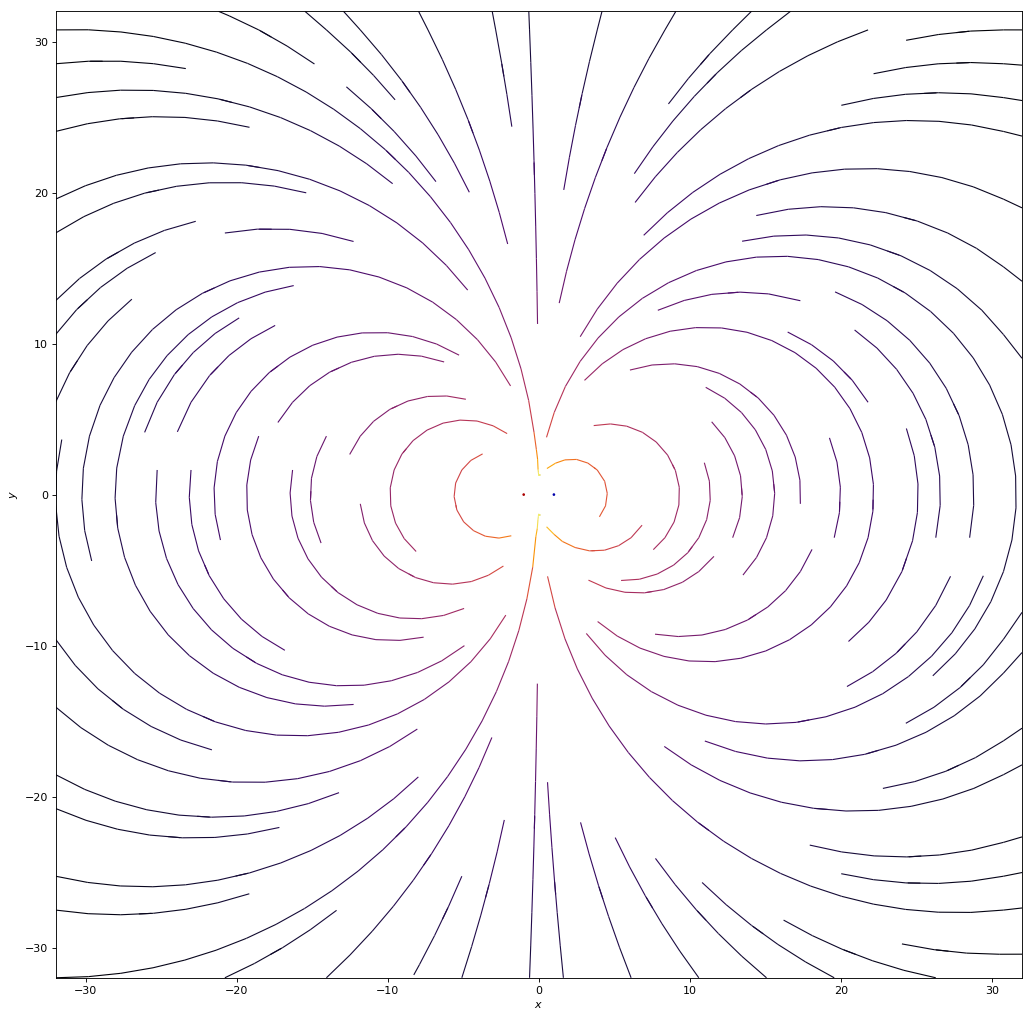

In [12]:
# Grid of x, y points
nx, ny = 64, 64
xlim = 32
ylim = 32
x = np.linspace(-xlim, xlim, nx)
y = np.linspace(-ylim, ylim, ny)
X, Y = np.meshgrid(x, y)

##Plots ################################################################
fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)

# Plot the electric potential with an appropriate colormap and arrow style

#calculates the electric potential of the dipole in the plane
Ex, Ey = potential_vector(charges, nx, ny, X, Y)
color = 2 * np.log(np.hypot(Ex, Ey))
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap='inferno',
              density=1, arrowstyle='-', arrowsize=1)

# Add filled circles for the charges themselves
charge_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in charges:
    ax.add_artist(Circle(pos, 0.05, color=charge_colors[q>0]))
##############################################################################

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-xlim, xlim)
ax.set_ylim(-ylim, ylim)
ax.set_aspect('equal')
plt.show()

## Calculando el campo magnetico (programa 4)

Las principales ecuaciones a utilizar son la del campo magnetico de un espacio de puntos

In [13]:

def B(x, y, amps = 2):
    mu = 1.26 * 10**(-6)                            #Magnetic constant                       
    mag = (mu/(2*np.pi))*(amps/np.sqrt((x)**2+(y)**2)) #Magnitude of the vector B
    by = mag * (np.cos(np.arctan2(y,x)))            #By
    bx = mag * (-np.sin(np.arctan2(y,x)))           #Bx
    bz = z*0                                        #Bz (zero, using the right-hand rule)
    return bx, by, bz


Y de un cilindro que sera el alambre en el espacio

In [14]:

def cylinder(r):
    phi = np.linspace(-2*np.pi,2*np.pi,100)
    x = r*np.cos(phi)
    y = r*np.sin(phi)
    return x,y


Define el espacio en el que se graficara el campo magnetico y con un amperaje de:

In [15]:
amps = 2

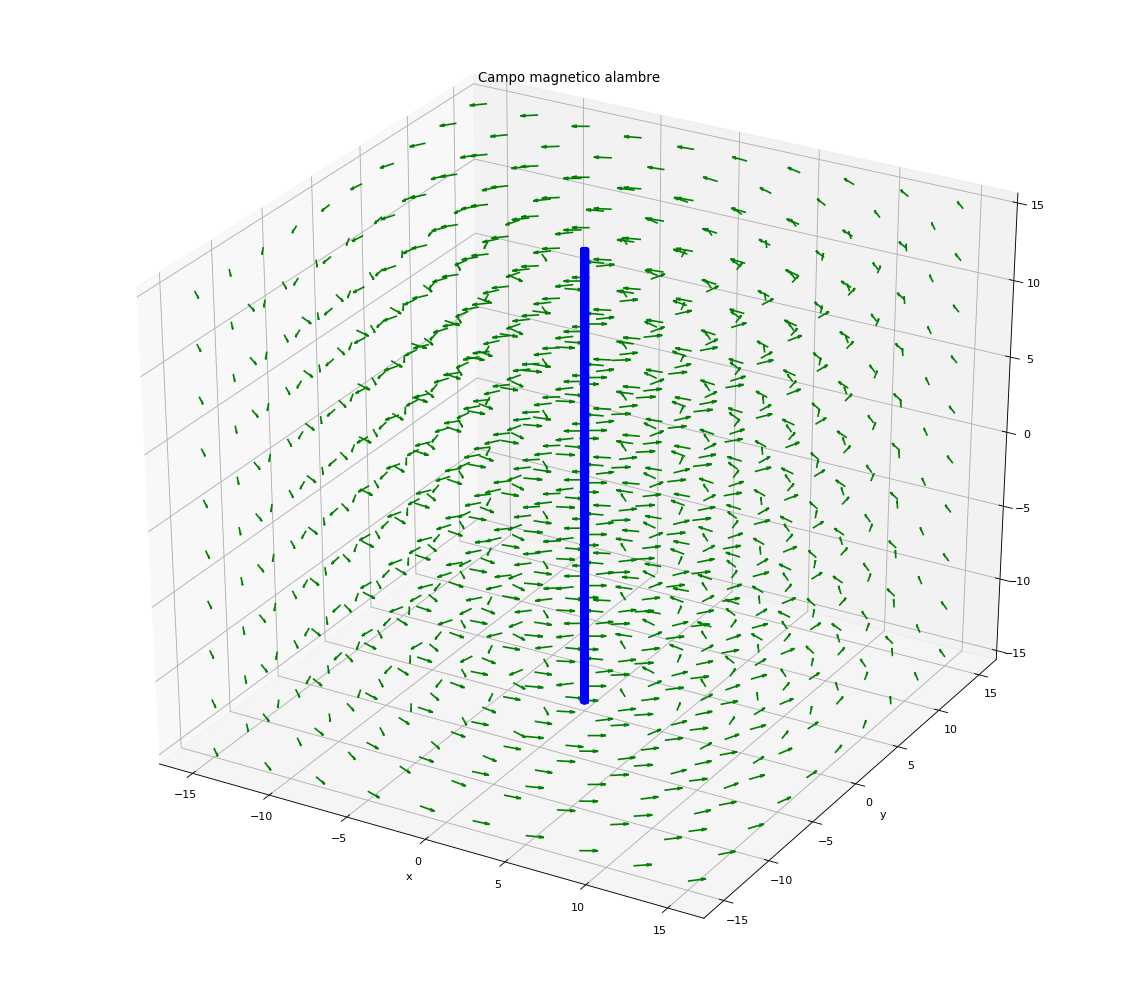

In [16]:


lim = 15
lim2 = 10
x = np.linspace(-lim,lim, lim2)
y = np.linspace(-lim,lim, lim2)
z = np.linspace(-lim,lim, lim2)

x,y,z = np.meshgrid(x,y,z)


# Plot of the fields
bx,by,bz = B(x, y, amps)                             #Magnetic field
cx,cy = cylinder(0.2)                               #Wire

# 3d figure
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.gca(projection='3d')

# Plot of the 3d vector field
ax.quiver(x, y, z, bx, by, bz, color='g', length=1, normalize=True)

                                                    #Plot the magnetic field
for i in np.linspace(-lim, lim, 800):                     #Plot the wire
    ax.plot(cx,cy,i,label='Cylinder',color='b')

plt.title('Campo magnetico alambre')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


Para visualizar el inverso, se hace correr la corriente inversa:

In [17]:
amps = -amps

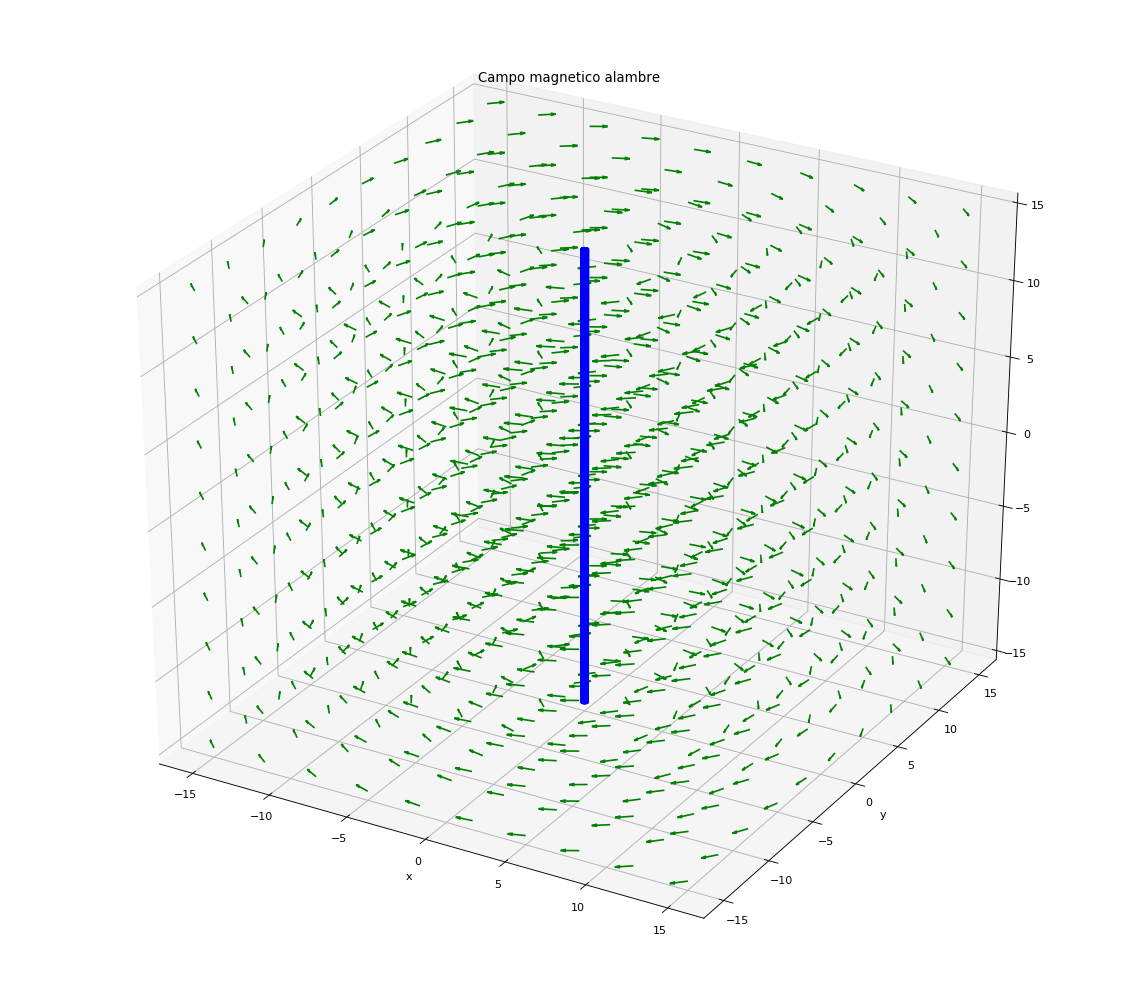

In [18]:
# Plot of the fields
bx,by,bz = B(x, y, amps)                             #Magnetic field
cx,cy = cylinder(0.2)                               #Wire

# 3d figure
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.gca(projection='3d')

# Plot of the 3d vector field
ax.quiver(x, y, z, bx, by, bz, color='g', length=1, normalize=True)

                                                    #Plot the magnetic field
for i in np.linspace(-lim, lim, 800):                     #Plot the wire
    ax.plot(cx,cy,i,label='Cylinder',color='b')

plt.title('Campo magnetico alambre')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
